In [230]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from numpy import array
import math as math
from mpl_toolkits.mplot3d import Axes3D

In [153]:
initial_A, initial_B = 5, -1.4

In [154]:
def Actual(x):
    a = initial_A
    b = initial_B
    #r = math.sin(x*a)+math.sin(x/b)
    r = [math.sin(i)*a+math.sin(i*b) for i in x]
    #r = a*x+b
    return np.asarray(r)

In [236]:
def lossMap(x1,y1,x2,y2,step=0.01):
    #r,step=1,0.01
    x = np.arange(x1, x2, step)
    y = np.arange(y1, y2, step)
    xx,yy = np.meshgrid(x,y)
    f1=np.arange(-30,30,0.1)
    zz=[[loss(f1,i,j) for i in x] for j in y]
    return xx, yy, zz


In [155]:
def GenerateDataSet(low=0,high=200, step=1):
    size = int((high - low) / step)
    rdx = [(high - low) * i + low for i in np.random.rand(size)]
    #rdx = np.random.randint(low,high=high,size=size)
    #rdx = np.arange(low,high,step)
    return np.asarray(rdx),Actual(rdx)

In [156]:
def predict(x,a,b):
    r = [math.sin(i)*a+math.sin(i*b) for i in x]
    return r

In [157]:
def MSE(Y, YH):
     return np.square(Y - YH).mean()

In [158]:
def loss(x,a,b):
    return MSE(Actual(x),predict(x,a,b))

In [159]:
def lossMatrix(x,a,b,LR):
    mtr = [(a+LR*i,b+LR*j) for i in range(-1,2) for j in range(-1,2)]
    losses = [(loss(x,i[0],i[1]),i) for i in mtr]
    return losses

In [176]:
def fix(x,startA, startB, LR):
    result = [[startA, startB, loss(x,startA,startB)]]
    while True:
        losses = lossMatrix(x,startA,startB, LR)
        minLosses = min(losses, key = lambda t: t[0])
        if minLosses[1][0]==startA and minLosses[1][1]==startB:
            break
        startA,startB=minLosses[1]
        result+=[[startA, startB, minLosses[0]]]
        #print (minLosses,startA,startB)
        
    return result

In [151]:
??loss

In [246]:
x,y=GenerateDataSet(-20,20,step=0.01)

In [247]:
current_a,current_b=0,-1

In [248]:
lr=0.01

In [249]:
plt.plot(x, Actual(x), ',')
plt.plot(x, predict(x, current_a, current_b), 'r,')

In [250]:
result = fix(x, current_a, current_b, lr)
current_a, current_b, minLoss = result[-1]

In [251]:
#current_a,current_b, result
aresult = array(result)

In [266]:
xx, yy, zz=lossMap(-2.5, -2, 12, -0.4, 0.1)

<IPython.core.display.Javascript object>


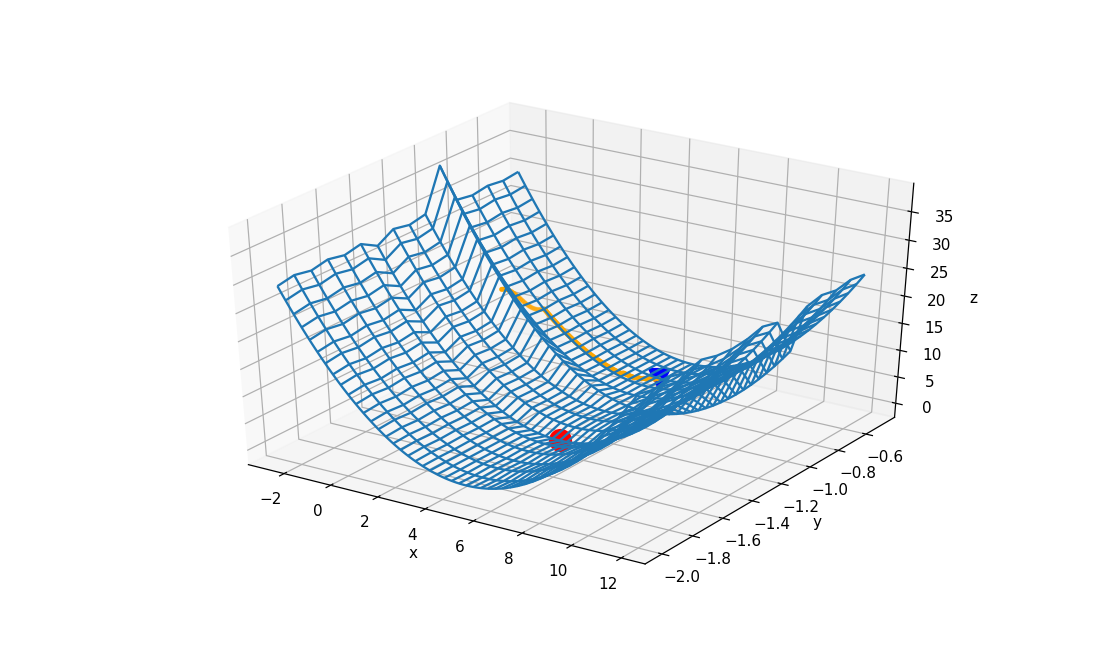

In [270]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

#ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm, zorder=-1)
#ax.plot_surface(xx, yy, [0]*xx, cmap=cm.coolwarm, zorder=-1)
ax.plot_wireframe(xx, yy, zz, cmap=cm.coolwarm, zorder=-1)

mm = np.argwhere(zz == np.min(zz))
mmx,mmy,mmz = xx[mm[0][0]][mm[0][1]], yy[mm[0][0]][mm[0][1]], np.min(zz)
ax.scatter([mmx], [mmy], [mmz], marker='o', c='red',s=200, zorder=30)

ax.scatter(aresult[:,0], aresult[:,1], aresult[:,2], marker='.', c='orange',s=20, zorder=30)
ax.scatter([current_a], [current_b], [minLoss], marker='v', c='blue',s=200, zorder=30)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
